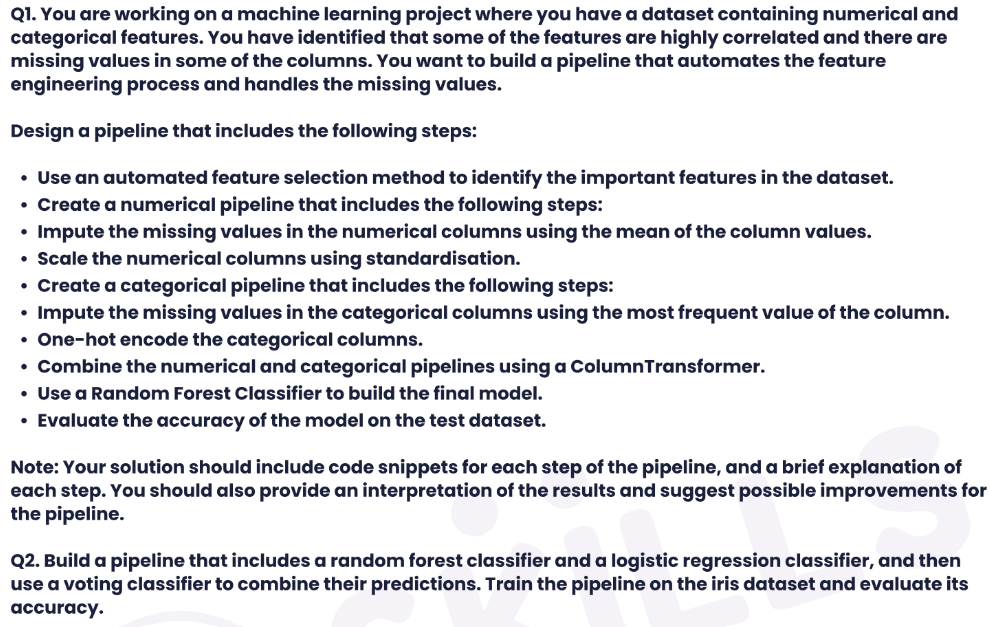

### Q2 Solution

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
import warnings
warnings.simplefilter('ignore')

In [3]:
dataset = load_iris()

In [17]:
df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
df['Target'] = dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
# segregate the feature into indepedent and dependent feature
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
# train test and split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [18]:
# import logistic regression 
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()

In [21]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier()

In [23]:
# import voting classifier
from sklearn.ensemble import VotingClassifier

In [24]:
vc = VotingClassifier(estimators=[('rf',rf),('lr',lr)],voting='hard')

In [25]:
# creating pipeline
from sklearn.pipeline import Pipeline

In [26]:
pipeline = Pipeline([('classifier',vc)])

In [29]:
# train the pipeline
pipeline.fit_transform(X_train,y_train)

array([[0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [2, 2],
       [2, 2],
       [1, 1],
       [2, 2],
       [1, 1],
       [2, 2],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 0],
       [2, 2],
       [2, 2],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 2],
       [0, 0],
       [2, 2],
       [0, 0],
       [0, 0],
       [1, 2],
       [1, 1],
       [2, 2],
       [1, 2],
       [2, 2],
       [2, 2],
       [1, 1],
       [0,

In [30]:
y_pred = pipeline.predict(X_test)

In [41]:
# Metric Evaluation
from sklearn.metrics import accuracy_score
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 1.0


### Q1 Solution

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# load tip dataset
df = sns.load_dataset('tips')
# read the data
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [147]:
# view categorical features
df.drop(labels=['time'],axis=1)
categorical_cols = [col for col in df.columns if df[col].dtypes == 'category']
categorical_cols

['sex', 'smoker', 'day']

In [148]:
# view numerical features
numerical_cols = [col for col in df.columns if df[col].dtypes != 'category']
numerical_cols.remove('time')
numerical_cols

['total_bill', 'tip', 'size']

In [149]:
# check for missing values in whole dataset
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [150]:
# label encoding on categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['time'] = encoder.fit_transform(df['time'])

In [151]:
# segregate the features into independent and dependent 
X = df.drop(labels=['time'],axis=1)
y = df['time']

In [152]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### creating pipeline for fetures engineering

In [153]:
# importing dependencies for pipeline and feature engineering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
categorical_cols = ['sex','smoker','day']
numerical_cols = ['total_bill','tip','size']

In [154]:
# pipeline for feature engineering for numerical and categorical
num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehotencoder',OneHotEncoder())
    ]
)

In [155]:
preprocessor = ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,numerical_cols),
        ('cat_pipeline',cat_pipeline,categorical_cols)
    ]
)

In [156]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [157]:
# model training automating
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [158]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tress': DecisionTreeClassifier(),
    'Logistic Regressor': LogisticRegression(),
    'svc' : SVC()
}

In [159]:
# performance evaluation 
from sklearn.metrics import accuracy_score

In [160]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    reports = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # train model
        model.fit(X_train,y_train)
        # predicting test data
        y_pred = model.predict(X_test)
        # Check for score
        score = accuracy_score(y_test,y_pred)
        reports[list(models.keys())[i]] = score
    return reports
        
        

In [161]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 0.9591836734693877,
 'Decision Tress': 0.9387755102040817,
 'Logistic Regressor': 1.0,
 'svc': 0.9591836734693877}